# Initial data cleaning

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize

from ipywidgets import widgets
from IPython.display import display

import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
dataLoc = '../data/raw/'

In [3]:
ls ../data/raw

client.csv
county_id_to_name_map.json
electricity_prices.csv
forecast_weather.csv
gas_prices.csv
historical_weather.csv
predict-energy-behavior-of-prosumers.zip
train.csv


## Data cleaning questions and to dos

### time

The first thing that attracts my attention is the time dependence of the data.
- Ho much time do they cover?
- Do the times fully overlap between datasets?


## Questions that arise while cleaning the data
- How do electricity prices vary by time of day / year? Gas prices?
- How does usage vary per user?
- Changing prevalence of different systems over time.
- Electricity prices can go negative! What is the impact of that?


## Basic data features, and check for missing data

Here, missing data can be date/times that do not have entries

In [5]:
def testDateRange(dates, frequency):
    """Test for missing data from a range of dates"""
    dates = pd.to_datetime(dates).sort_values()

    start = min(dates)
    end = max(dates)

    print(f'start: {start}')
    print(f'end: {end}')
    
    fullDateRange = pd.date_range(start, end, freq=frequency)

    if fullDateRange.shape[0] == dates.shape[0] and (fullDateRange == dates).all():
        print('Full range: ', (fullDateRange == dates).all() )
        return []
    else:
        # find missing data
        print('Full range: ', False)
        return fullDateRange.difference(dates)

### Price data

In [6]:
gasPrices = pd.read_csv(dataLoc+'gas_prices.csv')
electricityPrices = pd.read_csv(dataLoc+'electricity_prices.csv')

In [7]:
gasPrices.head()

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2
2,2021-09-03,45.85,46.40,2021-09-02,3
3,2021-09-04,46.30,46.80,2021-09-03,4
4,2021-09-05,46.30,46.58,2021-09-04,5


In [8]:
testDateRange(gasPrices.forecast_date, 'D')

start: 2021-09-01 00:00:00
end: 2023-05-30 00:00:00
Full range:  True


[]

In [9]:
testDateRange(gasPrices.origin_date, 'D')

start: 2021-08-31 00:00:00
end: 2023-05-29 00:00:00
Full range:  True


[]

No missing data for gas

In [10]:
electricityPrices.head()

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1


In [11]:
testDateRange(electricityPrices.forecast_date, 'H')

start: 2021-09-01 00:00:00
end: 2023-05-30 23:00:00
Full range:  False


DatetimeIndex(['2022-03-27 02:00:00', '2023-03-26 02:00:00'], dtype='datetime64[ns]', freq=None)

In [12]:
testDateRange(electricityPrices.origin_date, 'H')

start: 2021-08-31 00:00:00
end: 2023-05-29 23:00:00
Full range:  False


DatetimeIndex(['2022-03-26 02:00:00', '2023-03-25 02:00:00'], dtype='datetime64[ns]', freq=None)

We are missing two data points for electricity

#### Gas prices are daily. Electricity hourly, with 2 missing data points

_Recommendation:_ insert missing data as the average of the two points on either side. Alternatively, take into account periodicity, etc.


### Weather data

In [3]:
weatherForecast = pd.read_csv(dataLoc+'forecast_weather.csv')
weatherHistorical = pd.read_csv(dataLoc+'historical_weather.csv')

In [14]:
weatherForecast.head()

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
0,57.6,21.7,2021-09-01 00:00:00+00:00,1,15.655786,11.553613,0.904816,0.019714,0.000000,0.905899,-0.411328,-9.106137,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0
1,57.6,22.2,2021-09-01 00:00:00+00:00,1,13.003931,10.689844,0.886322,0.004456,0.000000,0.886658,0.206347,-5.355405,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0
2,57.6,22.7,2021-09-01 00:00:00+00:00,1,14.206567,11.671777,0.729034,0.005615,0.000000,0.730499,1.451587,-7.417905,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0
3,57.6,23.2,2021-09-01 00:00:00+00:00,1,14.844507,12.264917,0.336304,0.074341,0.000626,0.385468,1.090869,-9.163999,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0
4,57.6,23.7,2021-09-01 00:00:00+00:00,1,15.293848,12.458887,0.102875,0.088074,0.000015,0.176590,1.268481,-8.975766,1,2021-09-01 01:00:00+00:00,0.0,0.0,0.0,0.0


In [15]:
weatherHistorical.head()

,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
0,2021-09-01 00:00:00,14.4,12.0,0.0,0.0,1015.8,4,4,0,0,6.694444,3,0.0,0.0,0.0,57.6,21.7,1
1,2021-09-01 00:00:00,14.4,12.0,0.0,0.0,1015.8,4,4,0,0,6.694444,3,0.0,0.0,0.0,57.6,21.7,1
2,2021-09-01 00:00:00,14.0,12.0,0.0,0.0,1010.6,7,8,0,0,4.944444,353,0.0,0.0,0.0,57.6,22.2,1
3,2021-09-01 00:00:00,14.4,12.8,0.0,0.0,1014.9,6,7,0,0,5.833333,348,0.0,0.0,0.0,57.6,22.7,1
4,2021-09-01 00:00:00,14.4,12.8,0.0,0.0,1014.9,6,7,0,0,5.833333,348,0.0,0.0,0.0,57.6,22.7,1


#### Missing data in these tables can be in NA form

In [16]:
weatherForecast.isna().sum()

latitude                             0
longitude                            0
origin_datetime                      0
hours_ahead                          0
temperature                          0
dewpoint                             0
cloudcover_high                      0
cloudcover_low                       0
cloudcover_mid                       0
cloudcover_total                     0
10_metre_u_wind_component            0
10_metre_v_wind_component            0
data_block_id                        0
forecast_datetime                    0
direct_solar_radiation               0
surface_solar_radiation_downwards    2
snowfall                             0
total_precipitation                  0
dtype: int64

We have two missing data points, NA, for `surface_solar_radiation_downwards` in the forecast.

In [17]:
weatherHistorical.isna().sum()

datetime                  0
temperature               0
dewpoint                  0
rain                      0
snowfall                  0
surface_pressure          0
cloudcover_total          0
cloudcover_low            0
cloudcover_mid            0
cloudcover_high           0
windspeed_10m             0
winddirection_10m         0
shortwave_radiation       0
direct_solar_radiation    0
diffuse_radiation         0
latitude                  0
longitude                 0
data_block_id             0
dtype: int64

No NA data in the weather ground truth

#### Duplicated location x time data

In [18]:
weatherHistorical.groupby(['latitude', 'longitude', 'datetime']).count()

temperature  dewpoint  rain  snowfall  \
latitude longitude datetime                                                     
57.6     21.7      2021-09-01 00:00:00            2         2     2         2   
                   2021-09-01 01:00:00            2         2     2         2   
                   2021-09-01 02:00:00            2         2     2         2   
                   2021-09-01 03:00:00            2         2     2         2   
                   2021-09-01 04:00:00            2         2     2         2   
...                                             ...       ...   ...       ...   
59.7     28.2      2023-05-30 06:00:00            1         1     1         1   
                   2023-05-30 07:00:00            1         1     1         1   
                   2023-05-30 08:00:00            1         1     1         1   
                   2023-05-30 09:00:00            1         1     1         1   
                   2023-05-30 10:00:00            1         1     1         1   

                                        surface_pressure  cloudcover_total  \
latitude longitude datetime                                                  
57.6     21.7      2021-09-01 00:00:00                 2                 2   
                   2021-09-01 01:00:00                 2                 2   
                   2021-09-01 02:00:00                 2                 2   
                   2021-09-01 03:00:00                 2                 2   
                   2021-09-01 04:00:00                 2                 2   
...                                                  ...               ...   
59.7     28.2      2023-05-30 06:00:00                 1                 1   
                   2023-05-30 07:00:00                 1                 1   
                   2023-05-30 08:00:00                 1                 1   
                   2023-05-30 09:00:00                 1                 1   
                   2023-05-30 10:00:00                 1                 1   

                                        cloudcover_low  cloudcover_mid  \
latitude longitude datetime                                              
57.6     21.7      2021-09-01 00:00:00               2               2   
                   2021-09-01 01:00:00               2               2   
                   2021-09-01 02:00:00               2               2   
                   2021-09-01 03:00:00               2               2   
                   2021-09-01 04:00:00               2               2   
...                                                ...             ...   
59.7     28.2      2023-05-30 06:00:00               1               1   
                   2023-05-30 07:00:00               1               1   
                   2023-05-30 08:00:00               1               1   
                   2023-05-30 09:00:00               1               1   
                   2023-05-30 10:00:00               1               1   

                                        cloudcover_high  windspeed_10m  \
latitude longitude datetime                                              
57.6     21.7      2021-09-01 00:00:00                2              2   
                   2021-09-01 01:00:00                2              2   
                   2021-09-01 02:00:00                2              2   
                   2021-09-01 03:00:00                2              2   
                   2021-09-01 04:00:00                2              2   
...                                                 ...            ...   
59.7     28.2      2023-05-30 06:00:00                1              1   
                   2023-05-30 07:00:00                1              1   
                   2023-05-30 08:00:00                1              1   
                   2023-05-30 09:00:00                1              1   
                   2023-05-30 10:00:00                1              1   

                                        windd

We appear to have several duplicated rows in historical weather

In [19]:
(weatherHistorical.drop_duplicates().groupby(['latitude', 'longitude', 'datetime']).count() == 1).all()

temperature               True
dewpoint                  True
rain                      True
snowfall                  True
surface_pressure          True
cloudcover_total          True
cloudcover_low            True
cloudcover_mid            True
cloudcover_high           True
windspeed_10m             True
winddirection_10m         True
shortwave_radiation       True
direct_solar_radiation    True
diffuse_radiation         True
data_block_id             True
dtype: bool

They are fully duplicates, since drop_duplicates is sufficient

In [20]:
(weatherForecast.fillna(0).groupby(['latitude', 'longitude', 'origin_datetime', 'forecast_datetime']).count() ==1).all()

hours_ahead                          True
temperature                          True
dewpoint                             True
cloudcover_high                      True
cloudcover_low                       True
cloudcover_mid                       True
cloudcover_total                     True
10_metre_u_wind_component            True
10_metre_v_wind_component            True
data_block_id                        True
direct_solar_radiation               True
surface_solar_radiation_downwards    True
snowfall                             True
total_precipitation                  True
dtype: bool

There are no duplicated rows in weatherForecast

#### Missing location x time data

Want to see if we have data points for all locations, times, and forecast times.

In [21]:
# avoid problems caused by issues that we have already identified

weatherForecast = weatherForecast.fillna(0)
weatherHistorical = weatherHistorical.drop_duplicates()

In [22]:
(weatherHistorical[['latitude', 'longitude', 'datetime']].groupby(['latitude', 'longitude']).count() == 15275).all()

datetime    True
dtype: bool

Step 0: every location has the same number of timepoints

In [23]:
# pivot table of number of location, time combinations
historicalPivot = pd.pivot(
    weatherHistorical[['latitude', 'longitude', 'datetime', 'data_block_id']] \
                    .groupby(['latitude', 'longitude', 'datetime'])\
                    .count()\
                    .reset_index(['latitude', 'longitude', 'datetime']),
    index=['latitude', 'longitude'],
    columns=['datetime'],
    values='data_block_id'
) 
historicalPivot

datetime            2021-09-01 00:00:00  2021-09-01 01:00:00  \
latitude longitude                                             
57.6     21.7                         1                    1   
         22.2                         1                    1   
         22.7                         1                    1   
         23.7                         1                    1   
         24.7                         1                    1   
...                                 ...                  ...   
59.7     26.2                         1                    1   
         26.7                         1                    1   
         27.2                         1                    1   
         27.7                         1                    1   
         28.2                         1                    1   

datetime            2021-09-01 02:00:00  2021-09-01 03:00:00  \
latitude longitude                                             
57.6     21.7                         1                    1   
         22.2                         1                    1   
         22.7                         1                    1   
         23.7                         1                    1   
         24.7                         1                    1   
...                                 ...                  ...   
59.7     26.2                         1                    1   
         26.7                         1                    1   
         27.2                         1                    1   
         27.7                         1                    1   
         28.2                         1                    1   

datetime            2021-09-01 04:00:00  2021-09-01 05:00:00  \
latitude longitude                                             
57.6     21.7                         1                    1   
         22.2                         1                    1   
         22.7                         1                    1   
         23.7                         1                    1   
         24.7                         1                    1   
...                                 ...                  ...   
59.7     26.2                         1                    1   
         26.7                         1                    1   
         27.2                         1                    1   
         27.7                         1                    1   
         28.2                         1                    1   

datetime            2021-09-01 06:00:00  2021-09-01 07:00:00  \
latitude longitude                                             
57.6     21.7                         1                    1   
         22.2                         1                    1   
         22.7                         1                    1   
         23.7                         1                    1   
         24.7                         1                    1   
...                                 ...                  ...   
59.7     26.2                         1                    1   
         26.7                         1                    1   
         27.2                         1                    1   
         27.7                         1                    1   
         28.2                         1                    1   

datetime            2021-09-01 08:00:00  2021-09-01 09:00:00  ...  \
latitude longitude                                            ...   
57.6     21.7                         1                    1  ...   
         22.2                         1                    1  ...   
         22.7                         1                    1  ...   
         23.7                         1                    1  ...   
         24.7                         1                    1  ...   
...                                 ...                  ...  ...   
59.7     26.2                         1                    1  ...   
         26.7                         1        

In [24]:
print('all combinations: ', historicalPivot.all().all() )

all combinations:  True


In [25]:
allDates = historicalPivot.columns.to_series()

testDateRange(allDates, 'H')

start: 2021-09-01 00:00:00
end: 2023-05-30 10:00:00
Full range:  True


[]

Nice! The historical weather data covers a full range of dates.

In [26]:
# pivot table of number of location, time, forecast time combinations

timePlaceForecasts = weatherForecast[['latitude', 'longitude', 'origin_datetime', 'hours_ahead', 'data_block_id']] \
                                    .groupby(['latitude', 'longitude', 'origin_datetime', 'hours_ahead'])\
                                    .count()



In [27]:
(timePlaceForecasts == 1).all()

data_block_id    True
dtype: bool

So far, so good.

In [28]:
forecastPivot = pd.pivot(
    timePlaceForecasts.reset_index(['latitude', 'longitude', 'origin_datetime', 'hours_ahead']),
    index=['latitude', 'longitude'],
    columns=['origin_datetime','hours_ahead'],
    values='data_block_id'
) 
forecastPivot

origin_datetime    2021-09-01 00:00:00+00:00                             ...  \
hours_ahead                               1  2  3  4  5  6  7  8  9  10  ...   
latitude longitude                                                       ...   
57.6     21.7                              1  1  1  1  1  1  1  1  1  1  ...   
         22.2                              1  1  1  1  1  1  1  1  1  1  ...   
         22.7                              1  1  1  1  1  1  1  1  1  1  ...   
         23.2                              1  1  1  1  1  1  1  1  1  1  ...   
         23.7                              1  1  1  1  1  1  1  1  1  1  ...   
...                                      ... .. .. .. .. .. .. .. .. ..  ...   
59.7     26.2                              1  1  1  1  1  1  1  1  1  1  ...   
         26.7                              1  1  1  1  1  1  1  1  1  1  ...   
         27.2                              1  1  1  1  1  1  1  1  1  1  ...   
         27.7                              1  1  1  1  1  1  1  1  1  1  ...   
         28.2                              1  1  1  1  1  1  1  1  1  1  ...   

origin_datetime    2023-05-30 00:00:00+00:00                             
hours_ahead                               39 40 41 42 43 44 45 46 47 48  
latitude longitude                                                       
57.6     21.7                              1  1  1  1  1  1  1  1  1  1  
         22.2                              1  1  1  1  1  1  1  1  1  1  
         22.7                              1  1  1  1  1  1  1  1  1  1  
         23.2                              1  1  1  1  1  1  1  1  1  1  
         23.7                              1  1  1  1  1  1  1  1  1  1  
...                                      ... .. .. .. .. .. .. .. .. ..  
59.7     26.2                              1  1  1  1  1  1  1  1  1  1  
         26.7                              1  1  1  1  1  1  1  1  1  1  
         27.2                              1  1  1  1  1  1  1  1  1  1  
         27.7                              1  1  1  1  1  1  1  1  1  1  
         28.2                              1  1  1  1  1  1  1  1  1  1  

[112 rows x 30576 columns]

Here we are testing whether every combination of (latitude, longitude) in the table is paired with every combination of (time, hours_ahead).
That is to say, does every location have a forecast at every time for all 48 hours into the future?

In [29]:
(forecastPivot ==1).all().all()

True

In [30]:
altPivot = pd.pivot(
    timePlaceForecasts.reset_index(['latitude', 'longitude', 'origin_datetime', 'hours_ahead']),
    index=['latitude', 'longitude', 'hours_ahead'],
    columns=['origin_datetime'],
    values='data_block_id'
) 

testDateRange(altPivot.columns.to_series(), 'D')

start: 2021-09-01 00:00:00+00:00
end: 2023-05-30 00:00:00+00:00
Full range:  True


[]

Bang. We have all of the data there for both the forecasts and the historial weather.

The forecast is: every day, we get and hourly forecast for the next 48 hours.

#### Are the historical and forecast weather reports for the same locations

In [19]:
locationsForecast = weatherForecast.groupby(['latitude', 'longitude']).agg(placeholder=('temperature', 'count')).index

In [20]:
locationsHistorical = weatherHistorical.groupby(['latitude', 'longitude']).agg(placeholder=('temperature', 'count')).index

In [28]:
locationsHistorical.difference(locationsForecast)

MultiIndex([], names=['latitude', 'longitude'])

In [26]:
locationsForecast.difference(locationsHistorical)

MultiIndex([(57.6, 23.2),
            (57.6, 24.2)],
           names=['latitude', 'longitude'])

We have forecasts at all of the locations that we historical data for. 

There are two extra points for forecasts, which are points in the Gulf of Riga, southwest of Estonia

### Client and Training Data

In [39]:
clientData = pd.read_csv('../data/raw/client.csv')

In [40]:
clientData.head()

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2


Are there any sets of indices that we can rely on? 

In [33]:
clientTypeCounts = clientData[['product_type', 'county', 'is_business', 'date', 'data_block_id']]\
                            .groupby(['product_type', 'county', 'is_business', 'date'])\
                            .count()

(clientTypeCounts == 1).all()

data_block_id    True
dtype: bool

#### Ok, this data makes sense now: 
We should have a measurement of `eic_count` and `installed_capacity` for every combination of: (product_type, county, is_business, date)



In [34]:
clientPivot = pd.pivot(
    clientTypeCounts.reset_index( ['product_type', 'county', 'is_business', 'date']),
    index = ['date'],
    columns = ['product_type', 'county', 'is_business'],
    values= ['data_block_id']
)
clientPivot

data_block_id                                               ...  \
product_type             0                             1                 ...   
county                  0    4    5    7    11   15   0         1    2   ...   
is_business              1    1    1    1    1    1    0    1    0    0  ...   
date                                                                     ...   
2021-09-01             1.0  1.0  1.0  1.0  NaN  NaN  1.0  1.0  1.0  NaN  ...   
2021-09-02             1.0  1.0  1.0  1.0  NaN  NaN  1.0  1.0  1.0  NaN  ...   
2021-09-03             1.0  1.0  1.0  1.0  NaN  NaN  1.0  1.0  1.0  NaN  ...   
2021-09-04             1.0  1.0  1.0  1.0  NaN  NaN  1.0  1.0  1.0  NaN  ...   
2021-09-05             1.0  1.0  1.0  1.0  NaN  NaN  1.0  1.0  1.0  NaN  ...   
...                    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2023-05-25             1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   
2023-05-26             1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   
2023-05-27             1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   
2023-05-28             1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   
2023-05-29             1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   

                                                                
product_type    3                                               
county         10   11        12   13        14        15       
is_business     1    0    1    1    0    1    0    1    0    1  
date                                                            
2021-09-01    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
2021-09-02    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
2021-09-03    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
2021-09-04    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
2021-09-05    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
2023-05-25    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
2023-05-26    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
2023-05-27    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
2023-05-28    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
2023-05-29    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  

[636 rows x 69 columns]

First of all, the date check: do we have some measurement for each day?

In [35]:
testDateRange(clientPivot.index.to_series(), 'D')

start: 2021-09-01 00:00:00
end: 2023-05-29 00:00:00
Full range:  True


[]

In [36]:
(clientPivot.fillna(1) > 1).any().any()

False

No duplicates. However, it seems like there are some times and places where no systems of a given type were installed.

In [29]:
trainData = pd.read_csv('../data/raw/train.csv')

In [30]:
trainData.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2


Similarly, we want to find the 'independent variables' for this dataset.

In [31]:
trainTypeCounts = trainData[['prediction_unit_id', 'is_consumption', 'datetime', 'data_block_id']]\
                            .groupby(['prediction_unit_id', 'is_consumption', 'datetime'])\
                            .count()

(trainTypeCounts == 1).all()

data_block_id    True
dtype: bool

training data is specified by a unit id, datatime, and comsumption / production

In [35]:
trainTypeCounts = trainData[['county', 'is_business', 'product_type',  'is_consumption', 'datetime', 'data_block_id']]\
                            .groupby(['county','is_business', 'product_type', 'is_consumption', 'datetime'])\
                            .count()

(trainTypeCounts == 1).all()

data_block_id    True
dtype: bool

Alternatively, the training data seems to only have one prediction unit id for each `county`, `is_buisness`, `product_type` combination so these can act as independent variables as well

In [40]:
trainPivot = pd.pivot(
    trainTypeCounts.reset_index( ['prediction_unit_id', 'is_consumption', 'datetime']),
    index = 'datetime',
    columns = ['prediction_unit_id', 'is_consumption'],
    values = 'data_block_id'
)

In [41]:
trainPivot

prediction_unit_id    0         1         2         3         4        ...  \
is_consumption         0    1    0    1    0    1    0    1    0    1  ...   
datetime                                                               ...   
2021-09-01 00:00:00  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   
2021-09-01 01:00:00  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   
2021-09-01 02:00:00  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   
2021-09-01 03:00:00  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   
2021-09-01 04:00:00  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   
...                  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2023-05-31 19:00:00  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   
2023-05-31 20:00:00  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   
2023-05-31 21:00:00  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   
2023-05-31 22:00:00  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   
2023-05-31 23:00:00  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   

prediction_unit_id    64        65        66        67        68       
is_consumption         0    1    0    1    0    1    0    1    0    1  
datetime                                                               
2021-09-01 00:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-09-01 01:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-09-01 02:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-09-01 03:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-09-01 04:00:00  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...                  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
2023-05-31 19:00:00  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
2023-05-31 20:00:00  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
2023-05-31 21:00:00  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
2023-05-31 22:00:00  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
2023-05-31 23:00:00  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  

[15312 rows x 138 columns]

In [42]:
testDateRange(trainPivot.index.to_series(), 'H')

start: 2021-09-01 00:00:00
end: 2023-05-31 23:00:00
Full range:  True


[]

Nice, we can train on hourly predictions of certain units production.

In [43]:
trainPivot2 = pd.pivot(
    trainTypeCounts.reset_index( ['prediction_unit_id', 'is_consumption', 'datetime']),
    index = ['datetime', 'is_consumption'],
    columns = ['prediction_unit_id' ],
    values = 'data_block_id'
)

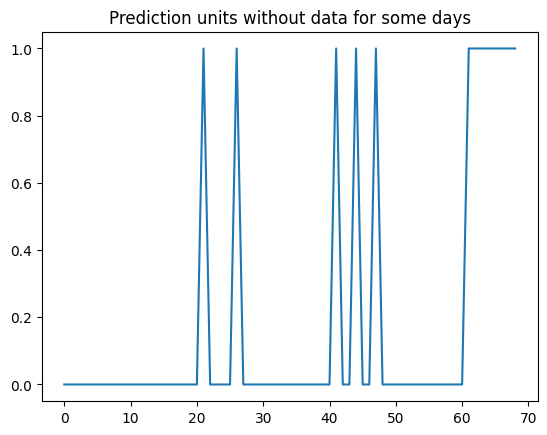

In [48]:
plt.title('Prediction units without data for some days')
plt.plot( trainPivot2.isna().any())

As the task writeup notes, prediction units can come and go. The higher numbered ones seem to do so more often, indicating to me that they come more that go.

#### Question: do the training set and client data share all of the same entries


In [70]:
trainingFiddle = trainData[['county', 'is_business', 'product_type',  'is_consumption', 'datetime', 'data_block_id']]
trainingFiddle['datetime'] = pd.to_datetime(trainingFiddle['datetime']).dt.date
trainingFiddle = trainingFiddle.groupby(['county','is_business', 'product_type', 'datetime']).count()

trainingProducers = trainingFiddle.index

clientFiddle = clientData[['county','is_business', 'product_type', 'data_block_id', 'date']]
clientFiddle['date'] = pd.to_datetime(clientFiddle['date']).dt.date

clientProducers = clientFiddle.groupby(['county','is_business', 'product_type', 'date']).count().index

/var/folders/6v/zs8dzfhn6q13fwyd231yww400000gn/T/ipykernel_2351/1685394315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingFiddle['datetime'] = pd.to_datetime(trainingFiddle['datetime']).dt.date
/var/folders/6v/zs8dzfhn6q13fwyd231yww400000gn/T/ipykernel_2351/1685394315.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientFiddle['date'] = pd.to_datetime(clientFiddle['date']).dt.date


In [71]:
trainingProducers.difference(clientProducers)

MultiIndex([( 0, 0, 1, 2023-05-30),
            ( 0, 0, 1, 2023-05-31),
            ( 0, 0, 2, 2023-05-30),
            ( 0, 0, 2, 2023-05-31),
            ( 0, 0, 3, 2023-05-30),
            ( 0, 0, 3, 2023-05-31),
            ( 0, 1, 0, 2023-05-30),
            ( 0, 1, 0, 2023-05-31),
            ( 0, 1, 1, 2023-05-30),
            ( 0, 1, 1, 2023-05-31),
            ...
            (15, 0, 1, 2023-05-30),
            (15, 0, 1, 2023-05-31),
            (15, 0, 3, 2023-05-30),
            (15, 0, 3, 2023-05-31),
            (15, 1, 0, 2023-05-30),
            (15, 1, 0, 2023-05-31),
            (15, 1, 1, 2023-05-30),
            (15, 1, 1, 2023-05-31),
            (15, 1, 3, 2023-05-30),
            (15, 1, 3, 2023-05-31)],
           names=['county', 'is_business', 'product_type', None], length=130)

In [73]:
clientProducers.difference(trainingProducers)

MultiIndex([], names=['county', 'is_business', 'product_type', None])

This means that everyone in the client dataset appears in the training dataset.

## Key takeaways:

### Structure

#### Date ranges
| Dataset     | Start Date  |  End Date   |  frequency  |
| ----------- | ----------- | ----------- | ----------- |
| Gas Price   | 2021-09-01  | 2023-05-30  |  Daily      |
| Electricity Price|   2021-09-01   |   2023-05-30   |    Hourly   |
| Historical Weather|  2021-09-01 | 2023-05-30 | Hourly |
| Weather Forecasts | 2021-09-01 | 2023-05-30 | Daily |
| Client data | 2021-09-01 | 2023-05-29 | Daily |
| Training Data | 2021-09-01 |  2023-05-31 | Hourly |

#### Locations
Forecast data is available for all locations where historical data is measured plus two locations in the Gulf of Riga

#### Clients

Every client in the client dataset also appears in the training dataset. There are some members of the training dataset that do not appear in the client dataset.


### Independent variables for each dataset:
- Gas Price: `forecast_date` or `origin_date`
- Electricity Price: `forecast_date` or `origin_date`
- Historical Weather: `latitude`, `longitude`, and `datetime`
- Weather Forcasts: `latitude`, `longitude`, and two of (`origin_datetime`, `hours_ahead`, `forecast_datetime`)
- Client Data: `county`, `date`, `product_type`, `is_business`
- Training Data: `datetime`, `is_consumption`, `prediction_unit_id`,  or `datetime`, `is_consumption`, `county`,`product_type`, `is_business`


### Data cleaning
Missing Data:
- 2 hours of electricity price data
- 2 points of one weather feature

Duplicate rows in true Weather




